In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the datasets
covid_data_path = 'covid_data_canada.csv'
stock_data_path = 'stock_companies_canada.csv'

covid_data = pd.read_csv(covid_data_path)
stock_data = pd.read_csv(stock_data_path)

print("COVID Data Sample:")
print(covid_data.head())
print("\nStock Data Sample:")
print(stock_data.head())

COVID Data Sample:
         Date Provinces and Territories  Total cases  Total deaths  \
0  2020-03-06                   Alberta            1             0   
1  2020-03-07                   Alberta            2             0   
2  2020-03-08                   Alberta            4             0   
3  2020-03-09                   Alberta            7             0   
4  2020-03-10                   Alberta            7             0   

   Total recovered  New cases  New deaths  New recovered  
0                0          1           0              0  
1                0          1           0              0  
2                0          2           0              0  
3                0          3           0              0  
4                0          0           0              0  

Stock Data Sample:
         Date     Adj Close         Close          High           Low  \
0  2018-01-02  16310.000000  16310.000000  16310.000000  16181.000000   
1  2018-01-03  16371.599609  16371.59960

In [ ]:
# Data Cleaning and Preprocessing

# Convert date columns to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Check for missing values
print("\nCOVID Data Missing Values:")
print(covid_data.isnull().sum())
print("\nStock Data Missing Values:")
print(stock_data.isnull().sum())

# Fill missing values as necessary
stock_data.fillna(method='ffill', inplace=True)


COVID Data Missing Values:
Date                         0
Provinces and Territories    0
Total cases                  0
Total deaths                 0
Total recovered              0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

Stock Data Missing Values:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Asset        0
dtype: int64


In [ ]:
# Define Time Periods

# The COVID-19 start date in Canada
covid_start_date = pd.Timestamp("2020-03-01")

# The 1-year pre-COVID and post-COVID periods
one_year_pre_covid_start = covid_start_date - pd.DateOffset(years=1)
one_year_post_covid_end = covid_start_date + pd.DateOffset(years=1)

# Filter stock data for 1-year pre- and post-COVID periods
one_year_pre_covid_data = stock_data[(stock_data['Date'] >= one_year_pre_covid_start) &
                                     (stock_data['Date'] < covid_start_date)]
one_year_post_covid_data = stock_data[(stock_data['Date'] >= covid_start_date) &
                                      (stock_data['Date'] <= one_year_post_covid_end)]

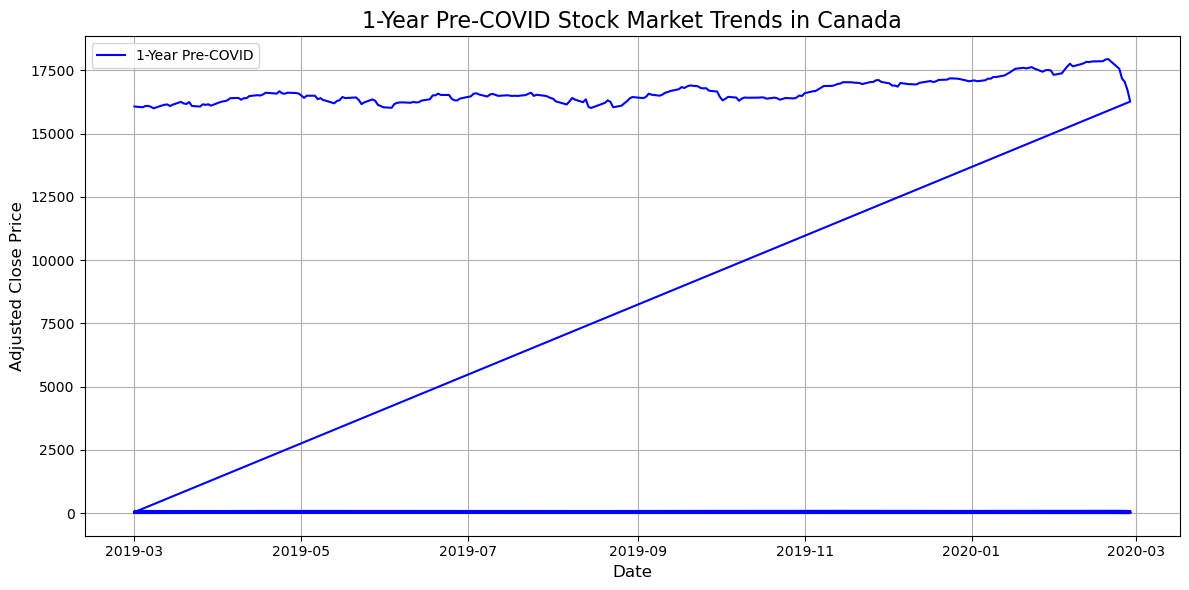

In [ ]:
# Visualization

# Plotting 1-Year Pre-COVID Stock Trends
plt.figure(figsize=(12, 6))
plt.plot(one_year_pre_covid_data['Date'], one_year_pre_covid_data['Adj Close'], label='1-Year Pre-COVID', color='blue')
plt.title('1-Year Pre-COVID Stock Market Trends in Canada', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

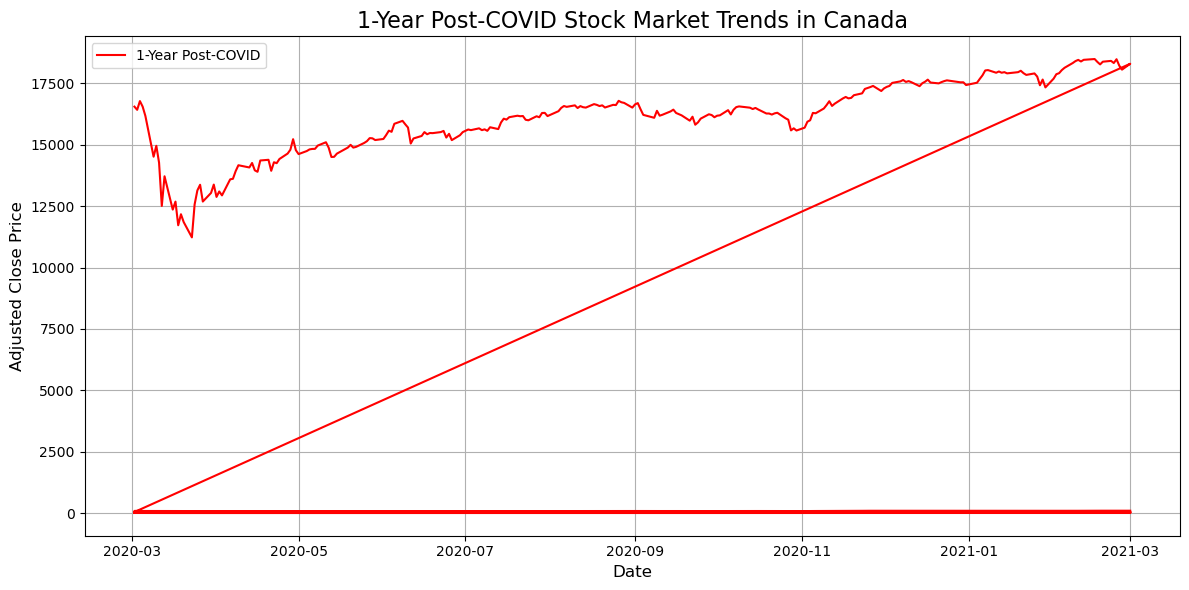

In [ ]:
# Plotting 1-Year Post-COVID Stock Trends
plt.figure(figsize=(12, 6))
plt.plot(one_year_post_covid_data['Date'], one_year_post_covid_data['Adj Close'], label='1-Year Post-COVID', color='red')
plt.title('1-Year Post-COVID Stock Market Trends in Canada', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

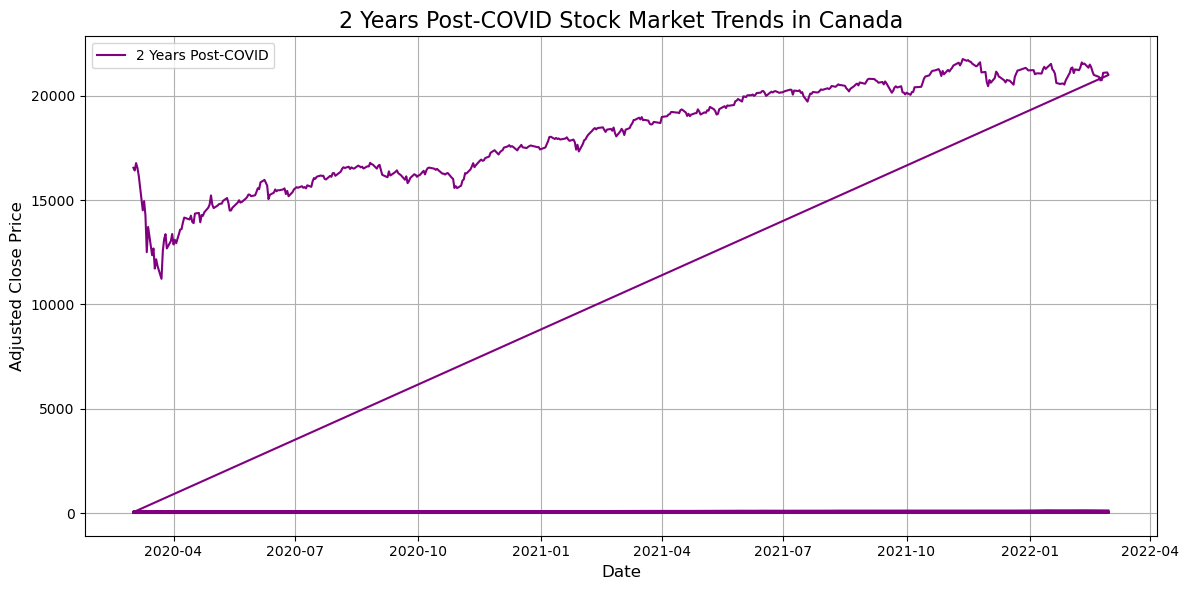

In [ ]:
# Define the COVID-19 start date and 2-year post-COVID period
covid_start_date = pd.Timestamp("2020-03-01")
two_years_post_covid_start = covid_start_date
two_years_post_covid_end = covid_start_date + pd.DateOffset(years=2)

# Filter stock data for this 2-year period
two_years_post_covid_data = stock_data[(stock_data['Date'] >= two_years_post_covid_start) &
                                       (stock_data['Date'] <= two_years_post_covid_end)]

# Plot Stock Trends for 2 Years Post-COVID
plt.figure(figsize=(12, 6))
plt.plot(two_years_post_covid_data['Date'], two_years_post_covid_data['Adj Close'],
         label='2 Years Post-COVID', color='purple')
plt.title('2 Years Post-COVID Stock Market Trends in Canada', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

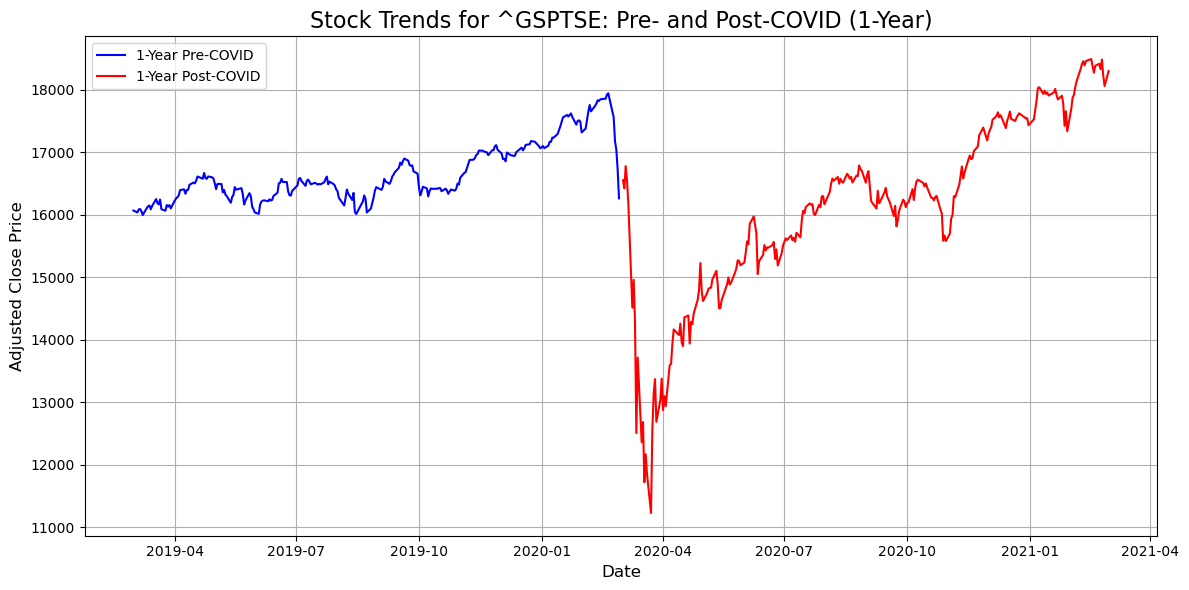

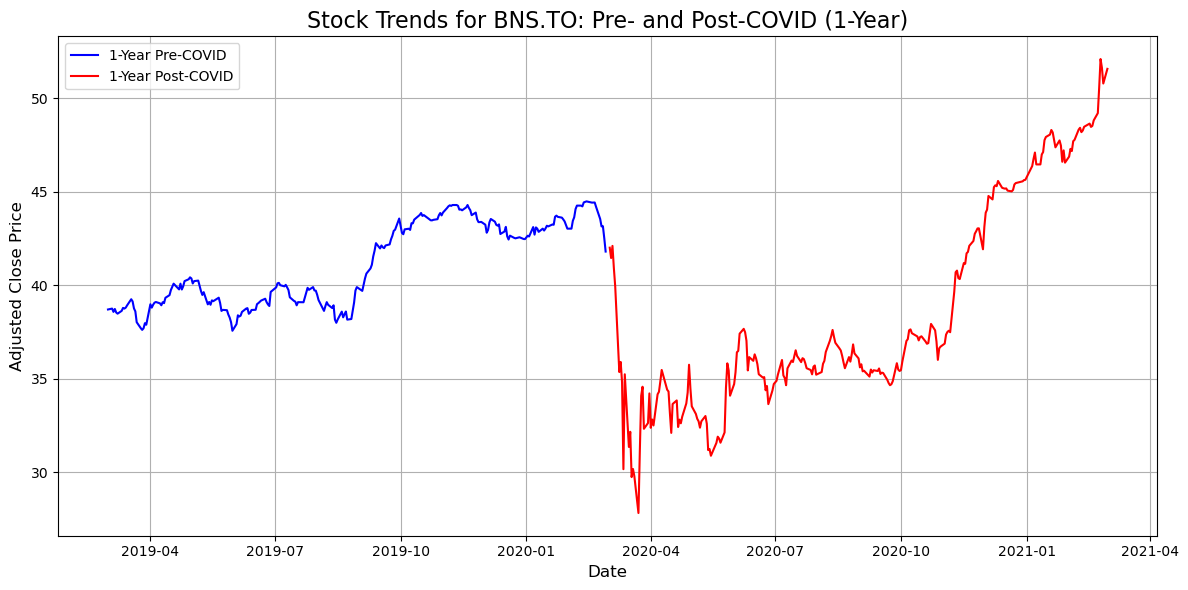

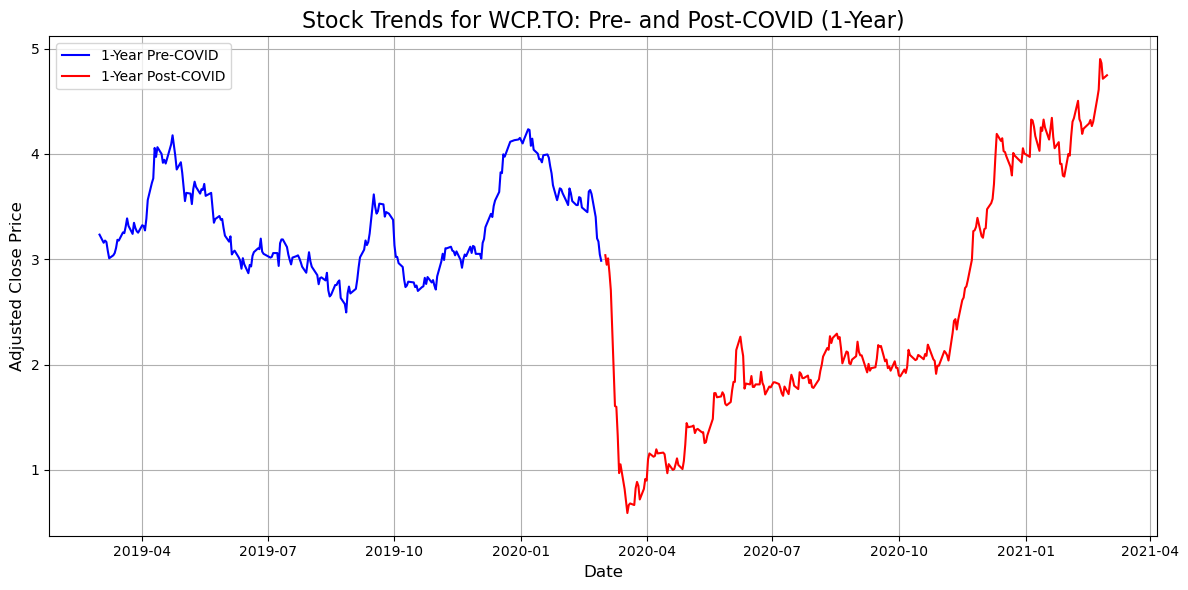

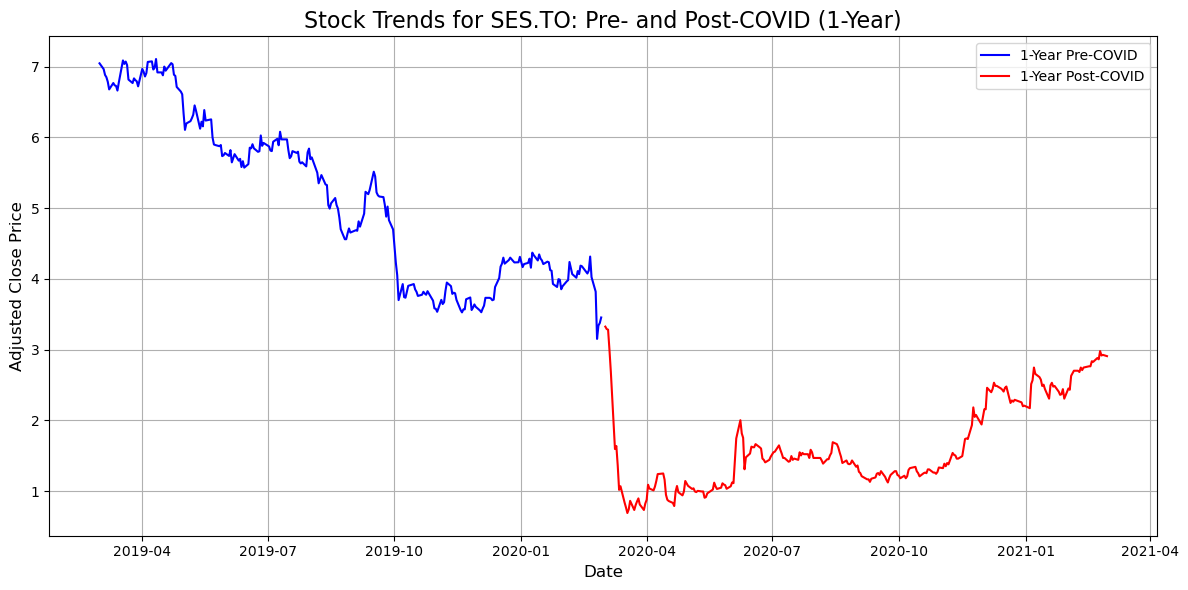

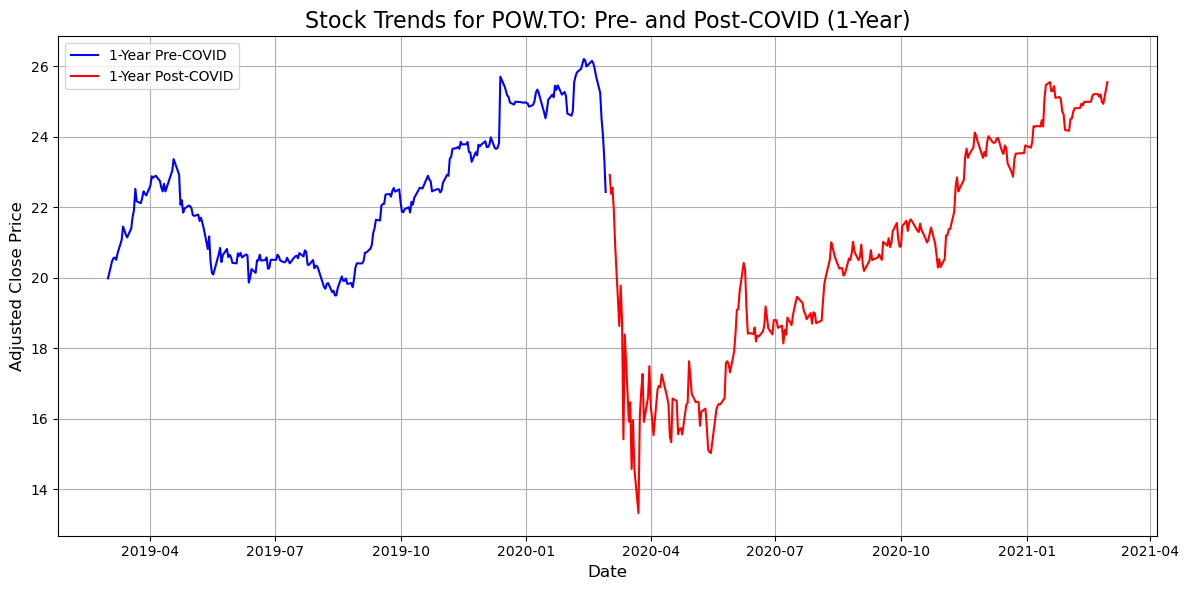

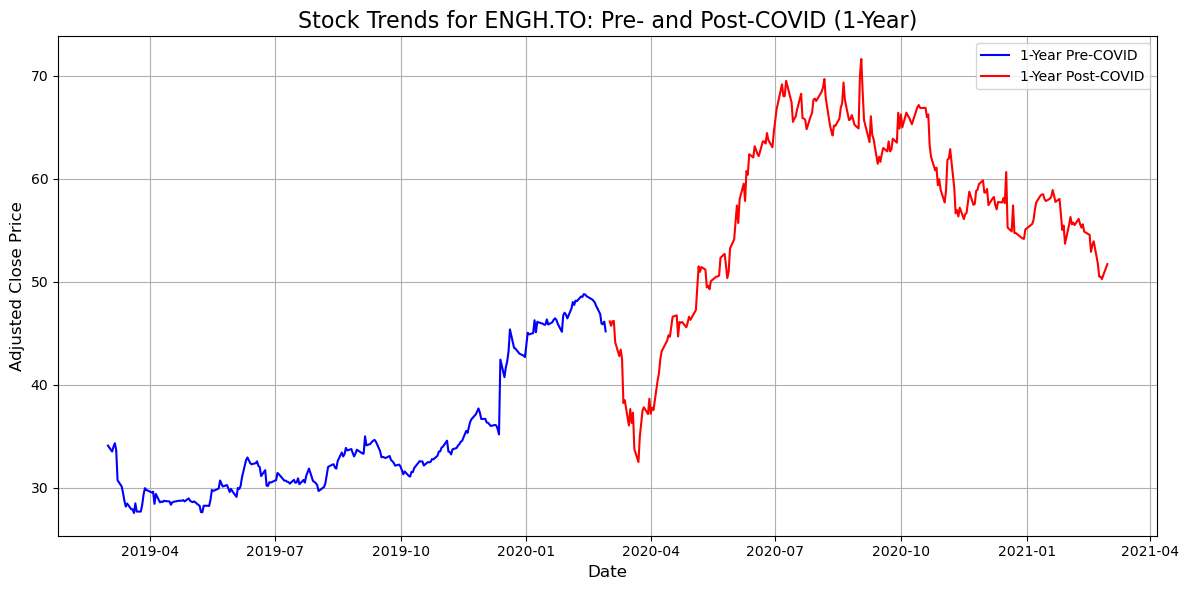

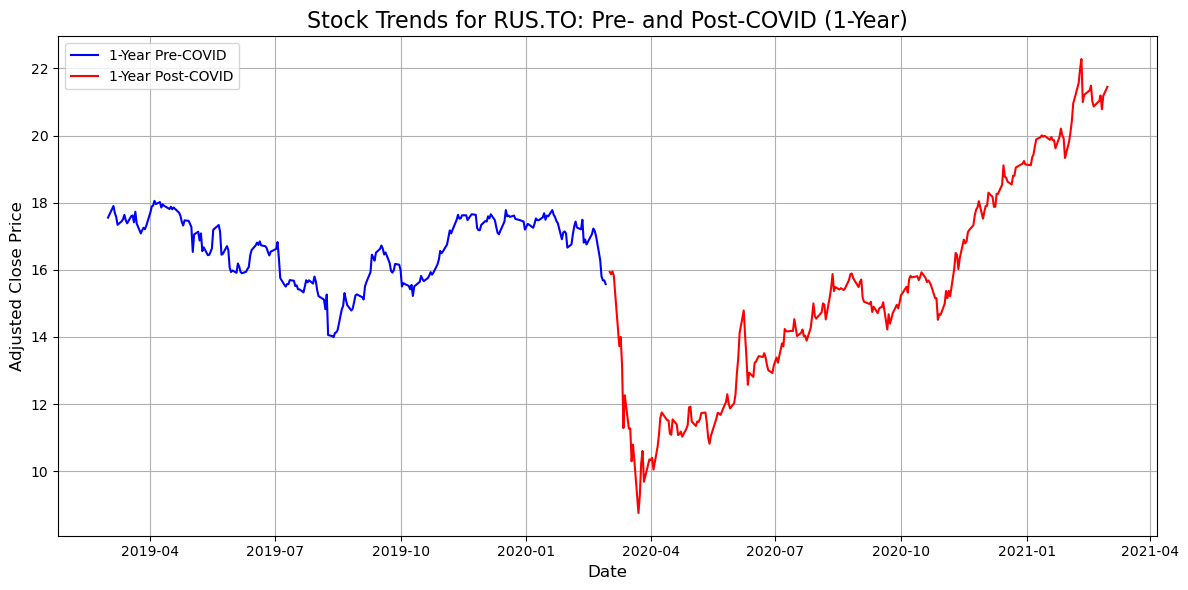

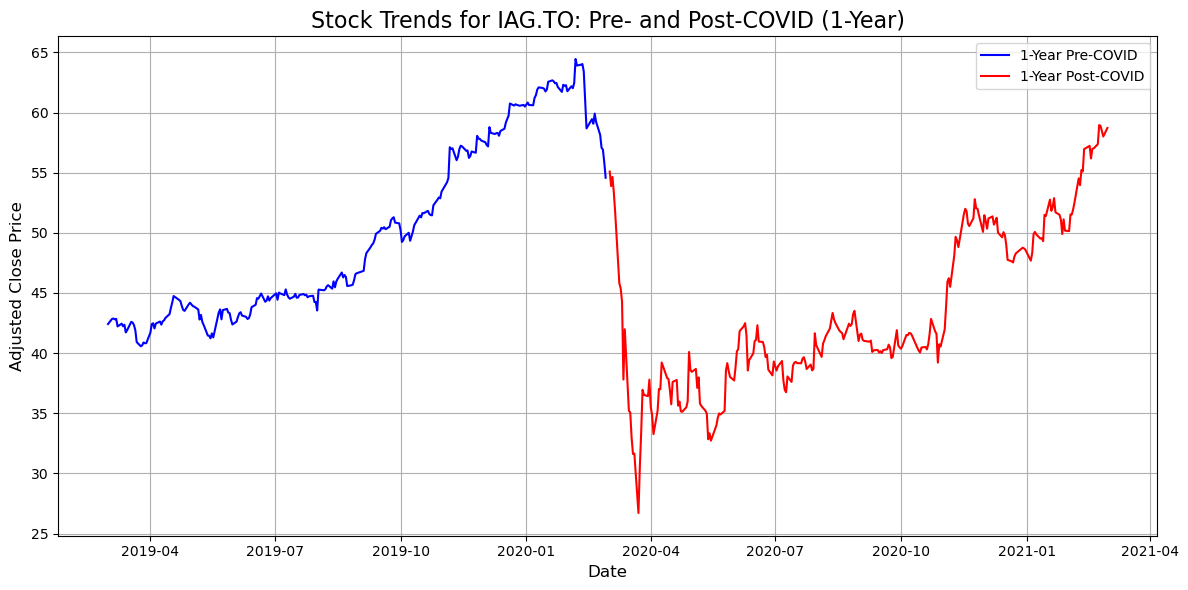

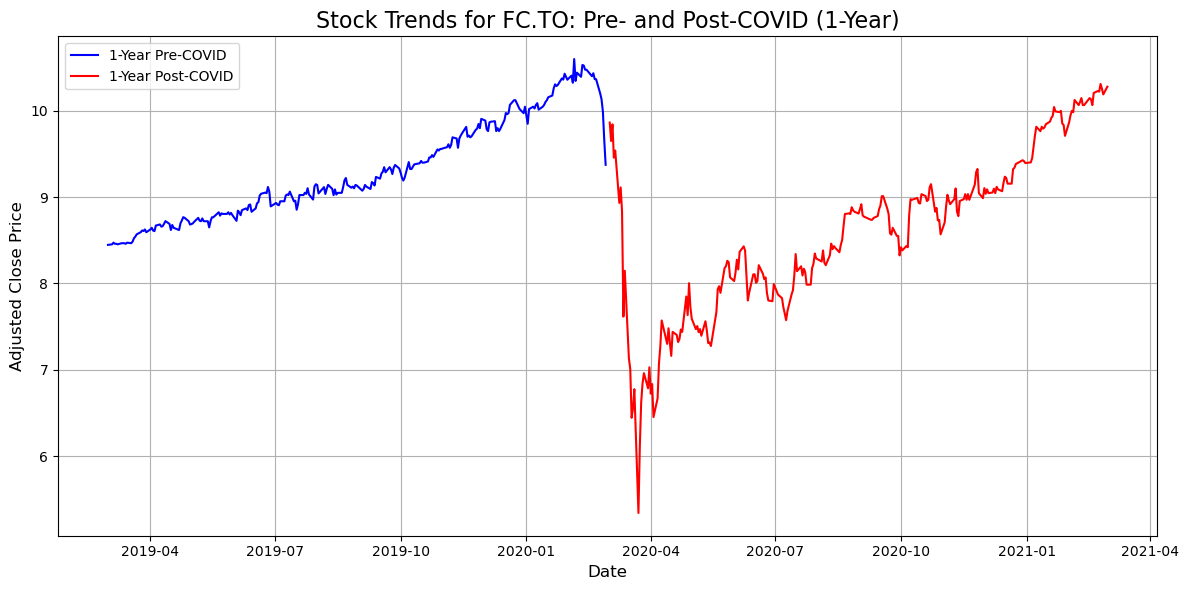

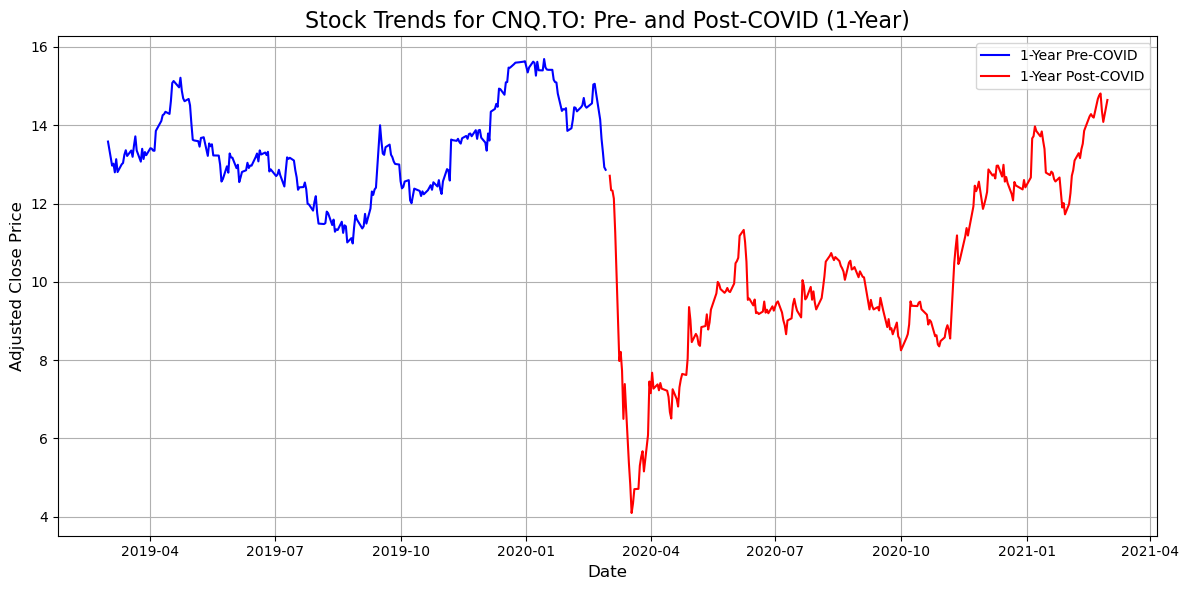

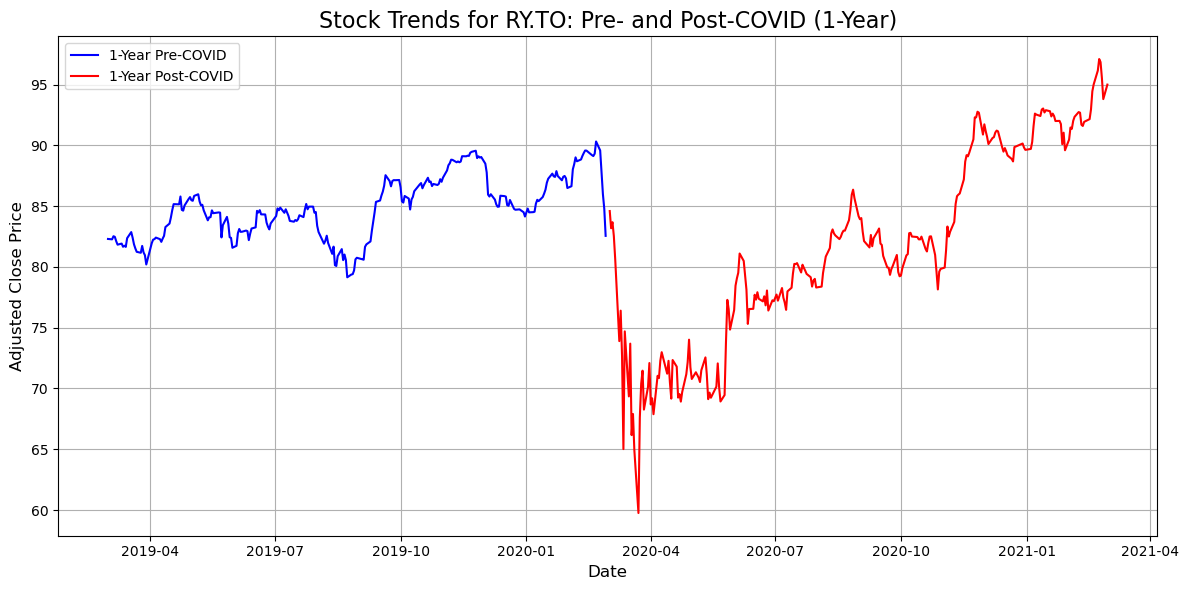

In [ ]:
# Extract unique stock assets
unique_assets_list = stock_data['Asset'].unique()

# Define the COVID-19 start date and pre-/post-COVID periods
covid_start_date = pd.Timestamp("2020-03-01")
one_year_pre_covid_start = covid_start_date - pd.DateOffset(years=1)
one_year_post_covid_end = covid_start_date + pd.DateOffset(years=1)

# Iterate over each stock asset and generate visualizations
for asset_name in unique_assets_list:  # Loop through the list of stock assets
    # Filter data for the specific stock asset
    asset_data = stock_data[stock_data['Asset'] == asset_name]

    # Filter pre-COVID and post-COVID data
    one_year_pre_covid_data = asset_data[(asset_data['Date'] >= one_year_pre_covid_start) &
                                         (asset_data['Date'] < covid_start_date)]
    one_year_post_covid_data = asset_data[(asset_data['Date'] >= covid_start_date) &
                                          (asset_data['Date'] <= one_year_post_covid_end)]

    # Plot Pre-COVID and Post-COVID trends for the stock
    plt.figure(figsize=(12, 6))
    plt.plot(one_year_pre_covid_data['Date'], one_year_pre_covid_data['Adj Close'],
             label='1-Year Pre-COVID', color='blue')
    plt.plot(one_year_post_covid_data['Date'], one_year_post_covid_data['Adj Close'],
             label='1-Year Post-COVID', color='red')
    plt.title(f'Stock Trends for {asset_name}: Pre- and Post-COVID (1-Year)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Adjusted Close Price', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

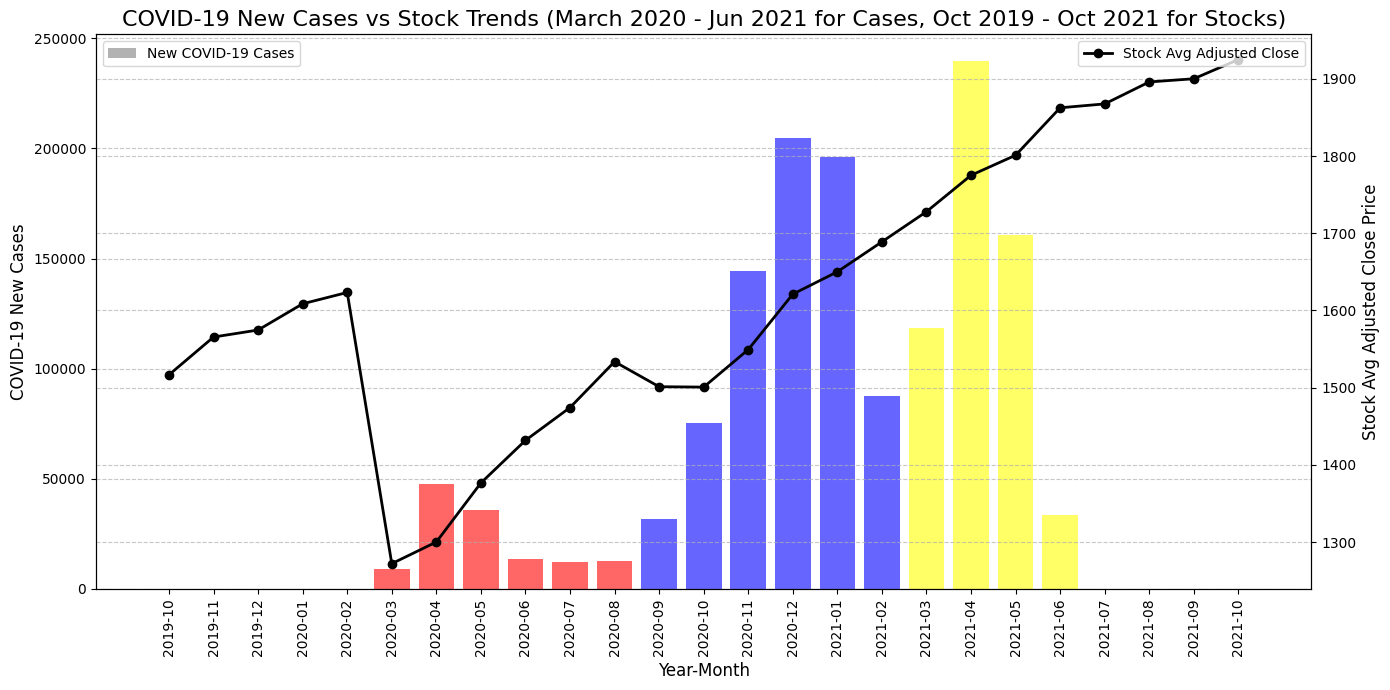

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

covid_data = pd.read_csv('covid_data_canada.csv')
stock_data = pd.read_csv('stock_companies_canada.csv')

covid_data['Date'] = pd.to_datetime(covid_data['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

four_months_before_first_wave = '2019-10-01'
third_wave_end_date = '2021-06-30'
four_months_after_third_wave = '2021-10-31'

covid_data_filtered = covid_data[(covid_data['Date'] >= four_months_before_first_wave) & (covid_data['Date'] <= third_wave_end_date)]

stock_data_filtered = stock_data[(stock_data['Date'] >= four_months_before_first_wave) & (stock_data['Date'] <= four_months_after_third_wave)]

covid_monthly = covid_data_filtered.groupby(covid_data_filtered['Date'].dt.to_period('M'))['New cases'].sum().reset_index()
stock_monthly = stock_data_filtered.groupby(stock_data_filtered['Date'].dt.to_period('M'))['Adj Close'].mean().reset_index()

merged_data = pd.merge(stock_monthly, covid_monthly, left_on='Date', right_on='Date', how='outer').fillna(0)

colors = []
for date in merged_data['Date']:
    if '2020-02' <= str(date) <= '2020-08':
        colors.append('red')
    elif '2020-09' <= str(date) <= '2021-02':
        colors.append('blue')
    elif '2021-02' <= str(date) <= '2021-06':
        colors.append('yellow')
    else:
        colors.append('gray')

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for COVID data with colors
ax1.bar(merged_data['Date'].astype(str), merged_data['New cases'], label='New COVID-19 Cases', color=colors, alpha=0.6)
ax1.set_xlabel("Year-Month", fontsize=12)
ax1.set_ylabel("COVID-19 New Cases", fontsize=12)
ax1.tick_params(axis='x', rotation=90)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Line plot for stock trends
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'].astype(str), merged_data['Adj Close'], label='Stock Avg Adjusted Close', color='black', linewidth=2, marker='o')
ax2.set_ylabel("Stock Avg Adjusted Close Price", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.title("COVID-19 New Cases vs Stock Trends (March 2020 - Jun 2021 for Cases, Oct 2019 - Oct 2021 for Stocks)", fontsize=16)
plt.tight_layout()

plt.show()

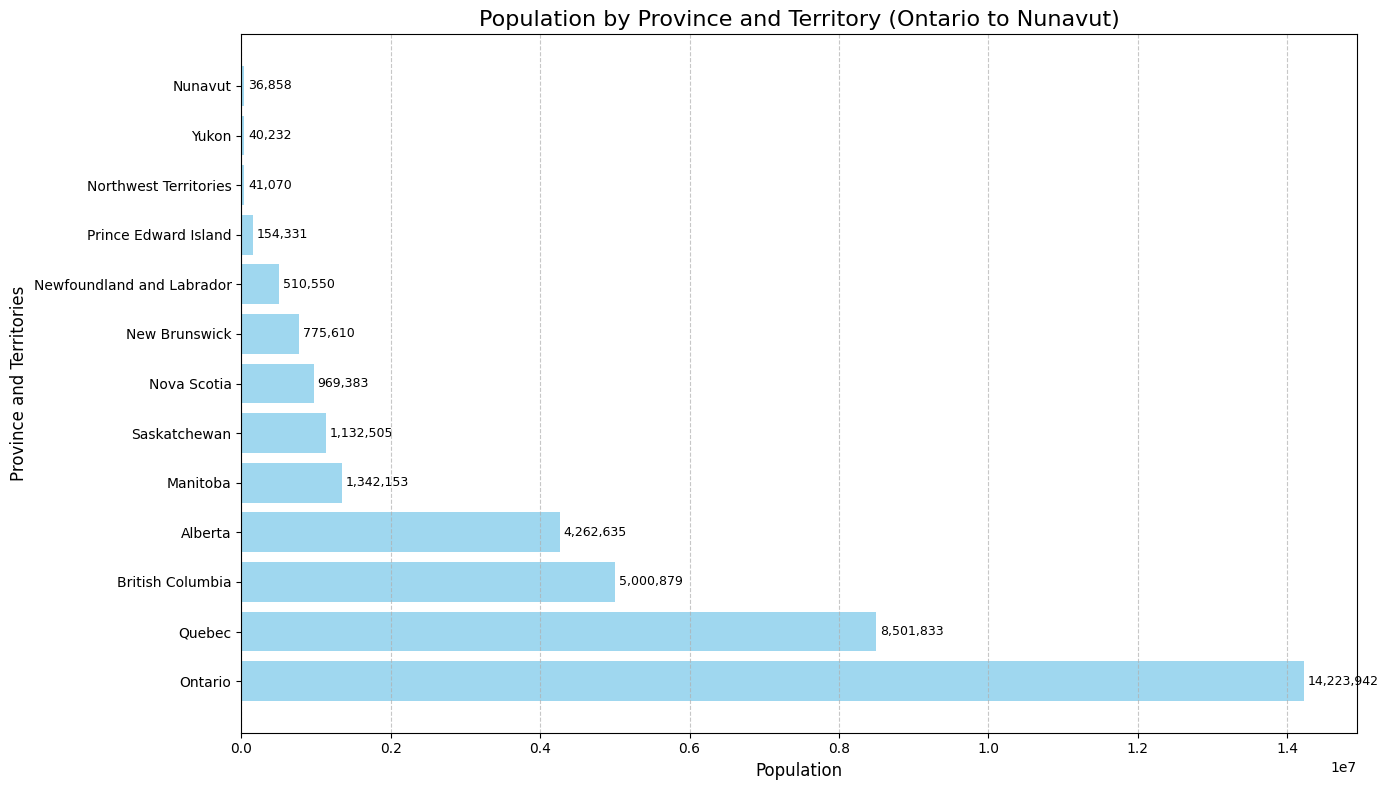

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the population dataset
population_data = pd.DataFrame({
    'Province and Territories': [
        'Ontario', 'Quebec', 'British Columbia', 'Alberta', 'Manitoba',
        'Saskatchewan', 'Nova Scotia', 'New Brunswick',
        'Newfoundland and Labrador', 'Prince Edward Island',
        'Northwest Territories', 'Yukon', 'Nunavut'
    ],
    'Total Population': [
        14223942, 8501833, 5000879, 4262635, 1342153,
        1132505, 969383, 775610,
        510550, 154331, 41070, 40232, 36858
    ]
})

# Sort the data as specified (Ontario to Nunavut)
sorted_population_data = population_data.set_index('Province and Territories').loc[
    ['Ontario', 'Quebec', 'British Columbia', 'Alberta', 'Manitoba',
     'Saskatchewan', 'Nova Scotia', 'New Brunswick',
     'Newfoundland and Labrador', 'Prince Edward Island',
     'Northwest Territories', 'Yukon', 'Nunavut']
].reset_index()

# Plotting the data in the specified order
plt.figure(figsize=(14, 8))
bars = plt.barh(sorted_population_data['Province and Territories'], sorted_population_data['Total Population'], color='skyblue', alpha=0.8)

# Add labels to each bar
for bar, label in zip(bars, sorted_population_data['Total Population']):
    plt.text(bar.get_width() + 50000, bar.get_y() + bar.get_height()/2, f'{label:,}',
             va='center', fontsize=9, color='black')

# Set labels and title
plt.xlabel("Population", fontsize=12)
plt.ylabel("Province and Territories", fontsize=12)
plt.title("Population by Province and Territory (Ontario to Nunavut)", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Conclusion

<li>The COVID-19 pandemic had a profound impact on the Canadian stock market. While the pre-COVID period was characterized by steady growth and stability, the post-COVID period was marked by an initial sharp decline, followed by a recovery driven by market adaptations. This underscores the market’s resilience but also highlights the challenges posed by global crises on investor sentiment and economic stability.